## Data Clustering: Seeds
#### Link to Data Set: https://www.kaggle.com/rwzhang/seeds-dataset

In [4]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### Part 1: Finding a Data Set

In [5]:
df = pd.read_csv('seeds_dataset.txt', sep= '\t', header= None,
                names=['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient',
                      'lengthOfKernelGroove','seedType'])
df.head()

area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0  15.26      14.84       0.8710           5.763          3.312   
1  14.88      14.57       0.8811           5.554          3.333   
2  14.29      14.09       0.9050           5.291          3.337   
3  13.84      13.94       0.8955           5.324          3.379   
4  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove  seedType  
0                 2.221                 5.220         1  
1                 1.018                 4.956         1  
2                 2.699                 4.825         1  
3                 2.259                 4.805         1  
4                 1.355                 5.175         1

In [6]:
df2 = df.drop(['area','perimeter'], axis = 1)
df2

compactness  lengthOfKernel  widthOfKernel  asymmetryCoefficient  \
0         0.8710           5.763          3.312                 2.221   
1         0.8811           5.554          3.333                 1.018   
2         0.9050           5.291          3.337                 2.699   
3         0.8955           5.324          3.379                 2.259   
4         0.9034           5.658          3.562                 1.355   
..           ...             ...            ...                   ...   
205       0.8783           5.137          2.981                 3.631   
206       0.8511           5.140          2.795                 4.325   
207       0.8883           5.236          3.232                 8.315   
208       0.8521           5.175          2.836                 3.598   
209       0.8684           5.243          2.974                 5.637   

     lengthOfKernelGroove  seedType  
0                   5.220         1  
1                   4.956         1  
2                   4.825         1  
3                   4.805         1  
4                   5.175         1  
..                    ...       ...  
205                 4.870         3  
206                 5.003         3  
207                 5.056         3  
208                 5.044         3  
209                 5.063         3  

[210 rows x 6 columns]

In [7]:
df.describe()

area   perimeter  compactness  lengthOfKernel  widthOfKernel  \
count  210.000000  210.000000   210.000000      210.000000     210.000000   
mean    14.847524   14.559286     0.870999        5.628533       3.258605   
std      2.909699    1.305959     0.023629        0.443063       0.377714   
min     10.590000   12.410000     0.808100        4.899000       2.630000   
25%     12.270000   13.450000     0.856900        5.262250       2.944000   
50%     14.355000   14.320000     0.873450        5.523500       3.237000   
75%     17.305000   15.715000     0.887775        5.979750       3.561750   
max     21.180000   17.250000     0.918300        6.675000       4.033000   

       asymmetryCoefficient  lengthOfKernelGroove    seedType  
count            210.000000            210.000000  210.000000  
mean               3.700201              5.408071    2.000000  
std                1.503557              0.491480    0.818448  
min                0.765100              4.519000    1.000000  
25%                2.561500              5.045000    1.000000  
50%                3.599000              5.223000    2.000000  
75%                4.768750              5.877000    3.000000  
max                8.456000              6.550000    3.000000

In [8]:
df.isna().any()

area                    False
perimeter               False
compactness             False
lengthOfKernel          False
widthOfKernel           False
asymmetryCoefficient    False
lengthOfKernelGroove    False
seedType                False
dtype: bool

<Figure size 504x504 with 0 Axes>

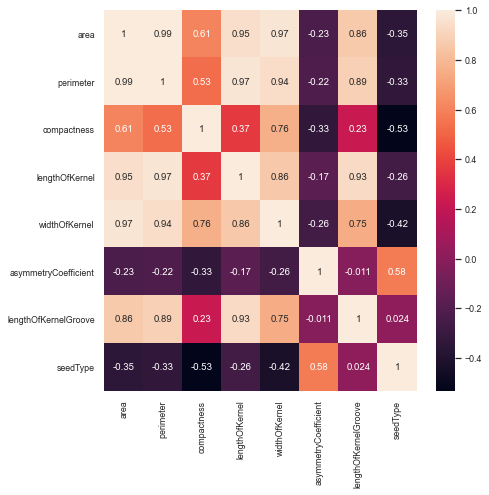

In [9]:
corr = df.corr()
plt.figure(figsize= (7,7))
sns.set(font_scale=0.8)
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
x = df
y = df['seedType']
y = y - 1
x = x.drop("seedType", axis = 1)

In [12]:
x = StandardScaler().fit_transform(x)

### Part 2: 2D Plot

In [13]:
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

<Figure size 576x576 with 0 Axes>

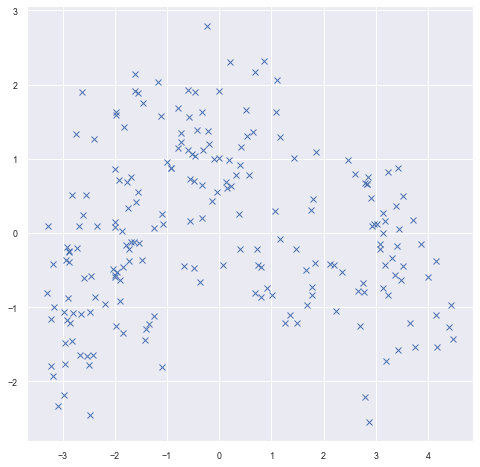

In [14]:
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

Yes, there are 3 visible groups that can seen in this 2D plot.

In [15]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3, cmap="jet")
    plot_centroids(clusterer.cluster_centers_)
    

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

KMeans(n_clusters=15)

KMeans(n_clusters=16)

KMeans(n_clusters=17)

KMeans(n_clusters=18)

KMeans(n_clusters=19)

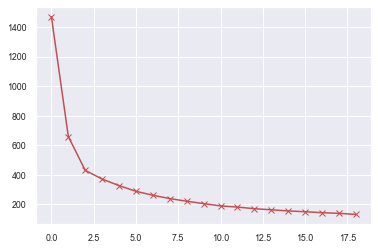

In [16]:
scores=[]
for i in range(1,20):
    
    means=KMeans(n_clusters=i)
    means.fit(x)

    scores.append(means.inertia_)
plt.plot(scores,"-rx")

### Part 3: Running K-Means & Visualised Results

KMeans(n_clusters=3, random_state=42)

<Figure size 576x576 with 0 Axes>

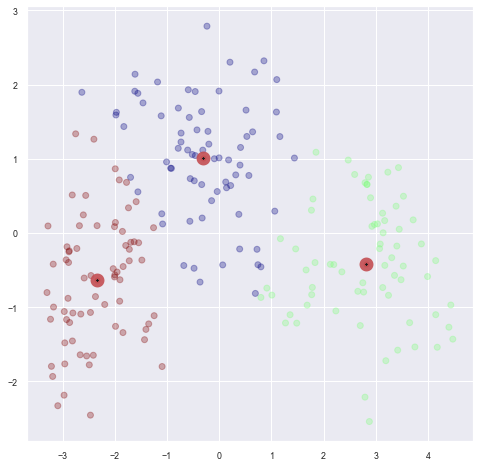

In [17]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_2d)
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_2d)

In [18]:
correct = 0
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_2d)
for i in range(len(x_2d)):
    prediction = kmeans.predict(x_2d)
    if prediction[i] == y[i]:
        correct += 1

print(correct, len(x_2d))
print(correct/len(x_2d))

KMeans(n_clusters=3, random_state=42)

194 210
0.9238095238095239


#### Experimenting with Different k Values

In [19]:
k = 4
kmeans3 = KMeans(n_clusters=k, random_state=42)
kmeans3.fit(x_2d)
correct=0
for i in range(len(x_2d)):
    prediction = kmeans3.predict(x_2d)
    if prediction[i] == y[i]:
        correct += 1

print(correct, len(x_2d))
print(correct/len(x_2d))

KMeans(n_clusters=4, random_state=42)

139 210
0.6619047619047619


KMeans(n_clusters=4, random_state=42)

<Figure size 576x576 with 0 Axes>

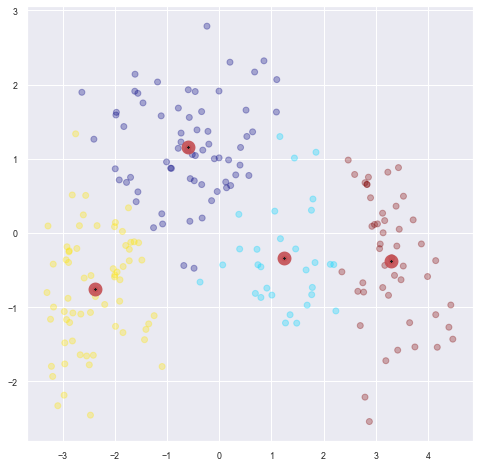

In [20]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_2d)
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_2d)

In [21]:
k = 5
kmeans3 = KMeans(n_clusters=k, random_state=42)
kmeans3.fit(x_2d)
correct=0
for i in range(len(x_2d)):
    prediction = kmeans3.predict(x_2d)
    if prediction[i] == y[i]:
        correct += 1

print(correct, len(x_2d))
print(correct/len(x_2d))

KMeans(n_clusters=5, random_state=42)

8 210
0.0380952380952381


KMeans(n_clusters=5, random_state=42)

<Figure size 576x576 with 0 Axes>

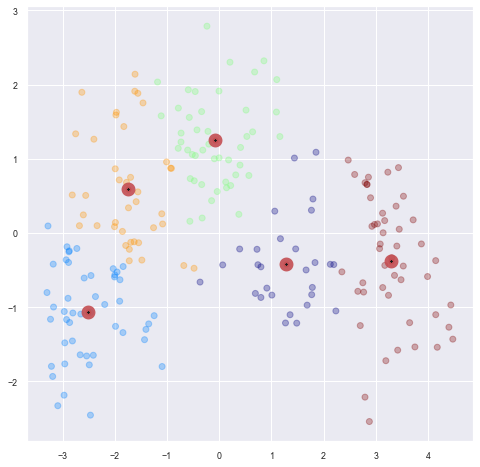

In [22]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_2d)
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_2d)

Correctness of clustering is highest when k=3 at 0.92 whereby a score of 1 indicates perfection. The correctness value was 0.66 when k=4 and 0.04 when k=5.

#### Experimenting with Features

In [23]:
x2 = df2
y2 = df2['seedType']
y2 = y2 - 1
x2 = x2.drop("seedType", axis = 1)

In [24]:
x2 = StandardScaler().fit_transform(x2)

In [25]:
pca = PCA(n_components=2)
x2_2d = pca.fit_transform(x2)

<Figure size 576x576 with 0 Axes>

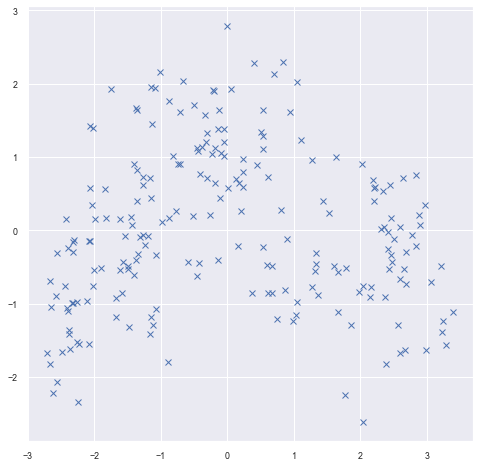

In [26]:
plt.figure(figsize=(8, 8))
a2 = plt.plot(x2_2d[:,0],x2_2d[:,1],"bx")

In [27]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x2_2d = pca.fit_transform(X)
    plt.scatter(x2_2d[:, 0], x2_2d[:, 1], c=labels, alpha=0.3, cmap="jet")
    plot_centroids(clusterer.cluster_centers_)
    

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

KMeans(n_clusters=15)

KMeans(n_clusters=16)

KMeans(n_clusters=17)

KMeans(n_clusters=18)

KMeans(n_clusters=19)

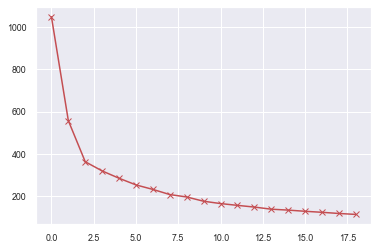

In [28]:
scores=[]
for i in range(1,20):
    
    means=KMeans(n_clusters=i)
    means.fit(x2)

    scores.append(means.inertia_)
plt.plot(scores,"-rx")

KMeans(n_clusters=3, random_state=42)

<Figure size 576x576 with 0 Axes>

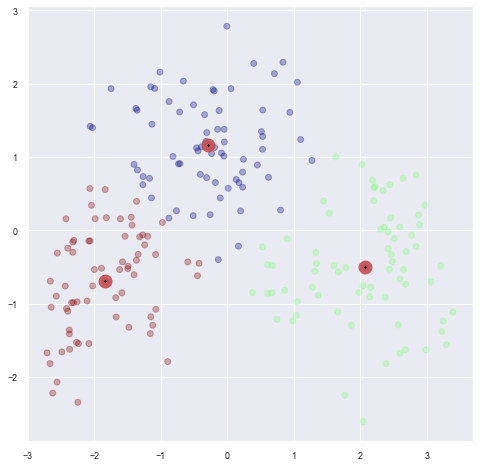

In [29]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x2_2d)
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x2_2d)

In [33]:
correct = 0
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x2_2d)
for i in range(len(x2_2d)):
    prediction = kmeans.predict(x2_2d)
    if prediction[i] == y2[i]:
        correct += 1

print(correct, len(x2_2d))
print(correct/len(x2_2d))



KMeans(n_clusters=3, random_state=42)

191 210
0.9095238095238095


I created a new dataset, df2, by exclusing "area" and "perimeter" from the original data set. When clustering was performed, the clustering accuracy dropped to 0.91 from 0.92, proving that clustering was more accurate when more features were present. 

#### Experimenting with Dimensions

KMeans(n_clusters=3, random_state=42)

<Figure size 576x576 with 0 Axes>

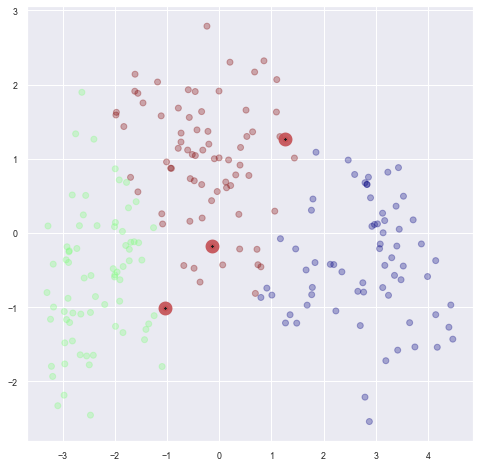

In [34]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x)

In [35]:
correct = 0
k=3
kmeans2 = KMeans(n_clusters=k, random_state=42)
kmeans2.fit(x)
for i in range(len(x)):
    prediction = kmeans2.predict(x)
    if prediction[i] == y[i]:
        correct += 1

print(correct, len(x))
print(correct/len(x))

KMeans(n_clusters=3, random_state=42)

6 210
0.02857142857142857


When clustered with the original features, clustering accuracy drops to 0.03 which is significantly lower than the accuracy when clustered with PCA. 

#### Best Cluster: Data Set with All Features/PCA/k=3

As seen from the clustering accuracy values, the best clusters were created when the data set was used with all features, a PCA was run, and a k value of 3 was used. 

### Part 4: Investigating Clusters

KMeans(n_clusters=3, random_state=42)

<Figure size 864x576 with 0 Axes>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

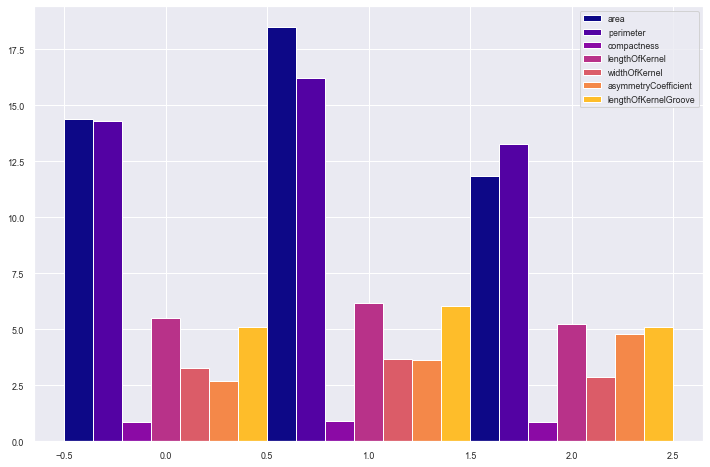

In [36]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_2d)

labels = kmeans.predict(x_2d)
df["cluster"] = labels

features = ['area', 'perimeter', 'compactness', 'lengthOfKernel','widthOfKernel','asymmetryCoefficient','lengthOfKernelGroove']

plt.figure(figsize=(12, 8))

cmap = plt.cm.get_cmap('plasma')

#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(df[df["cluster"]==i][f]) for i in range(k)]
    
    width = 1/(len(features))
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    plt.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
plt.legend()


There are no significant differences in the means of compactness, length of kernel, and width of kernel. There is mild difference in the mean of length of kernel grove between clusters 1/3 and cluster 2. There is significant difference in the means of area, perimeter, and asymmetry coefficient and this difference can be assumed to influence the distinct clusters in the plot. 